In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import zscore

#Problem 1
##Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

## A. What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/austo_automobile+(2)+(1).csv")
df.head(3)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV


In [ ]:
print("Number of records in the given dataset: ",df.shape[0])
print("Number of attributes in the given dataset: ",df.shape[1])

Number of records in the given dataset:  1581
Number of attributes in the given dataset:  14


In [ ]:
for i in df.columns:
  if(df[i].dtype=='object'): print(i)

Gender
Profession
Marital_status
Education
Personal_loan
House_loan
Partner_working
Make


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


##B. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data? If yes, perform preliminary treatment of data.

In [ ]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [ ]:
df['Gender']=df['Gender'].replace(to_replace='Femal',value='Female')
df['Gender']=df['Gender'].replace(to_replace='Femle',value='Female')
df['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

In [ ]:
df['Partner_salary']=df['Partner_salary'].fillna(df['Total_salary']-df['Salary'])

In [ ]:

df.isnull().sum()

Age                  0
Gender              53
Profession           0
Marital_status       0
Education            0
No_of_Dependents     0
Personal_loan        0
House_loan           0
Partner_working      0
Salary               0
Partner_salary       0
Total_salary         0
Price                0
Make                 0
dtype: int64

##C. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

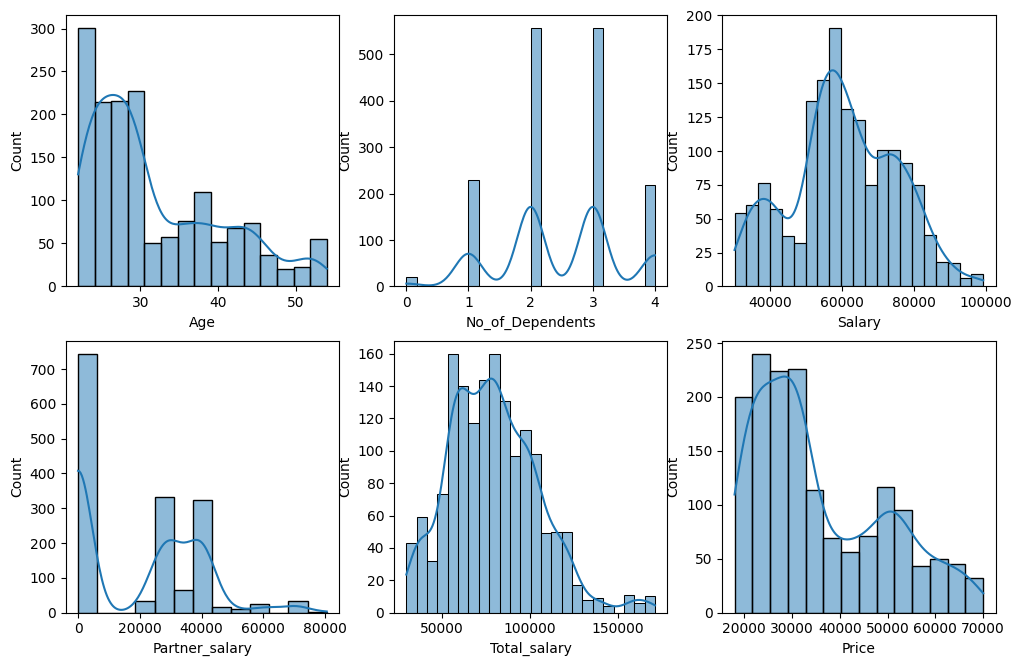

In [ ]:
pc=1
plt.figure(figsize=(12,12))
for i in df.select_dtypes(exclude=['object']):
  
  plt.subplot(3,3,pc)
  
  sb.histplot(data=df[df.notnull()],x=i,kde=True)
  pc+=1

In [ ]:
df.select_dtypes(exclude=['object']).shape[1]

6

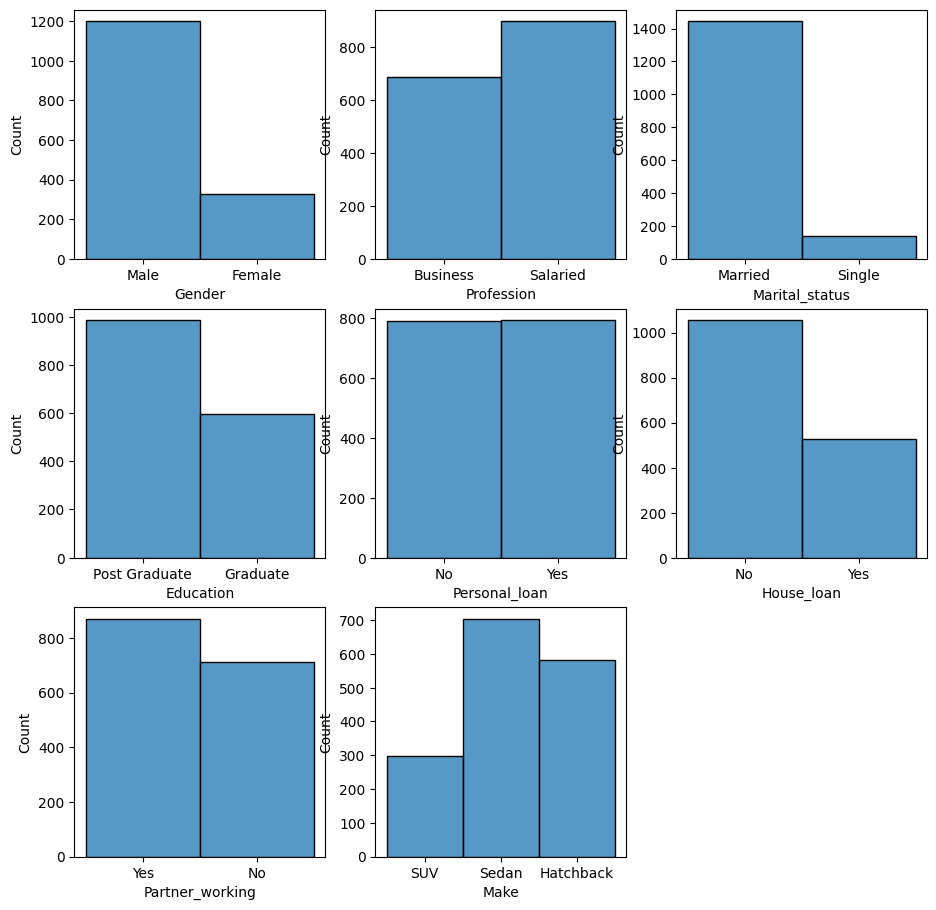

In [ ]:
pc=1
plt.figure(figsize=(11,11))
for i in df.select_dtypes(include=['object']):
  plt.subplot(3,3,pc)
  sb.histplot(data=df,x=i)
  pc+=1


##D. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data. 

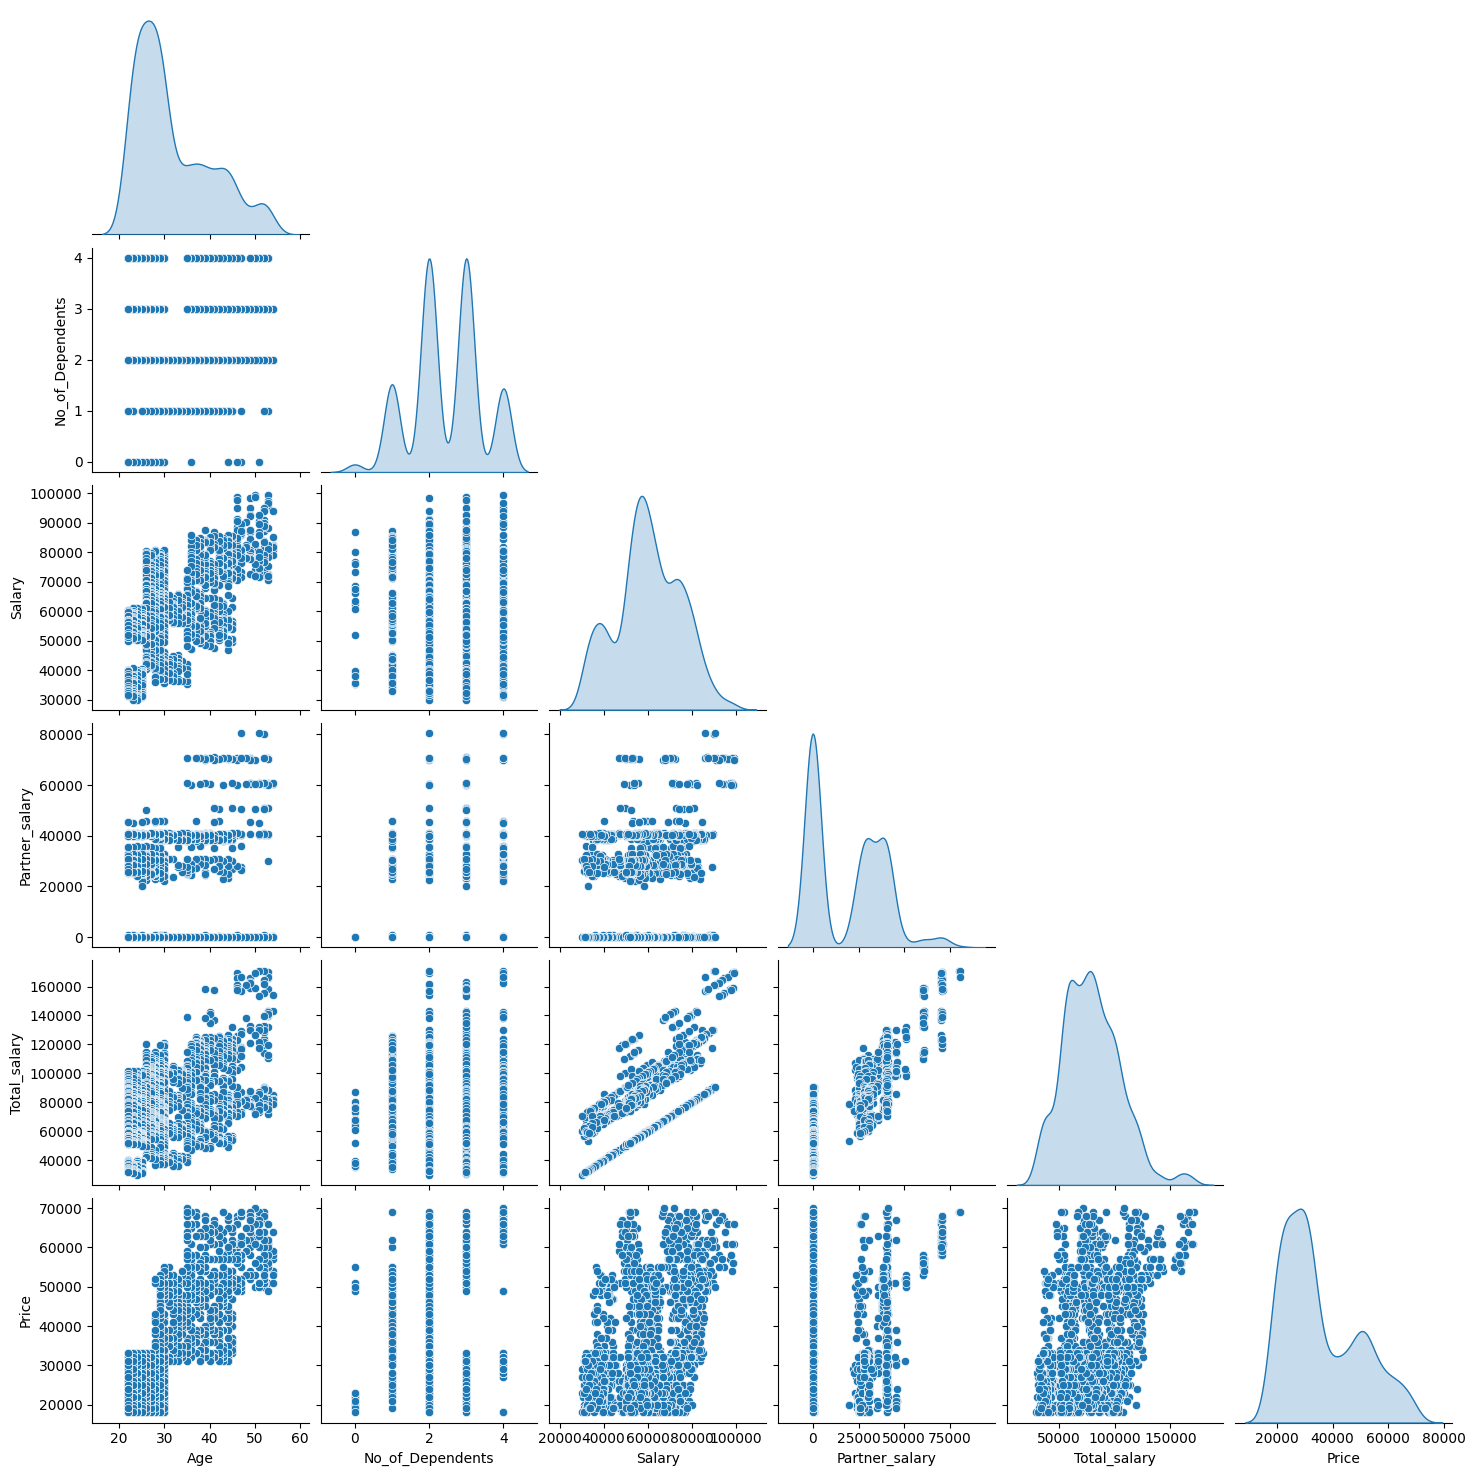

In [ ]:
sb.pairplot(data=df,vars=df.select_dtypes(exclude='object'),diag_kind='kde',kind='scatter',markers=["0"],corner=True);

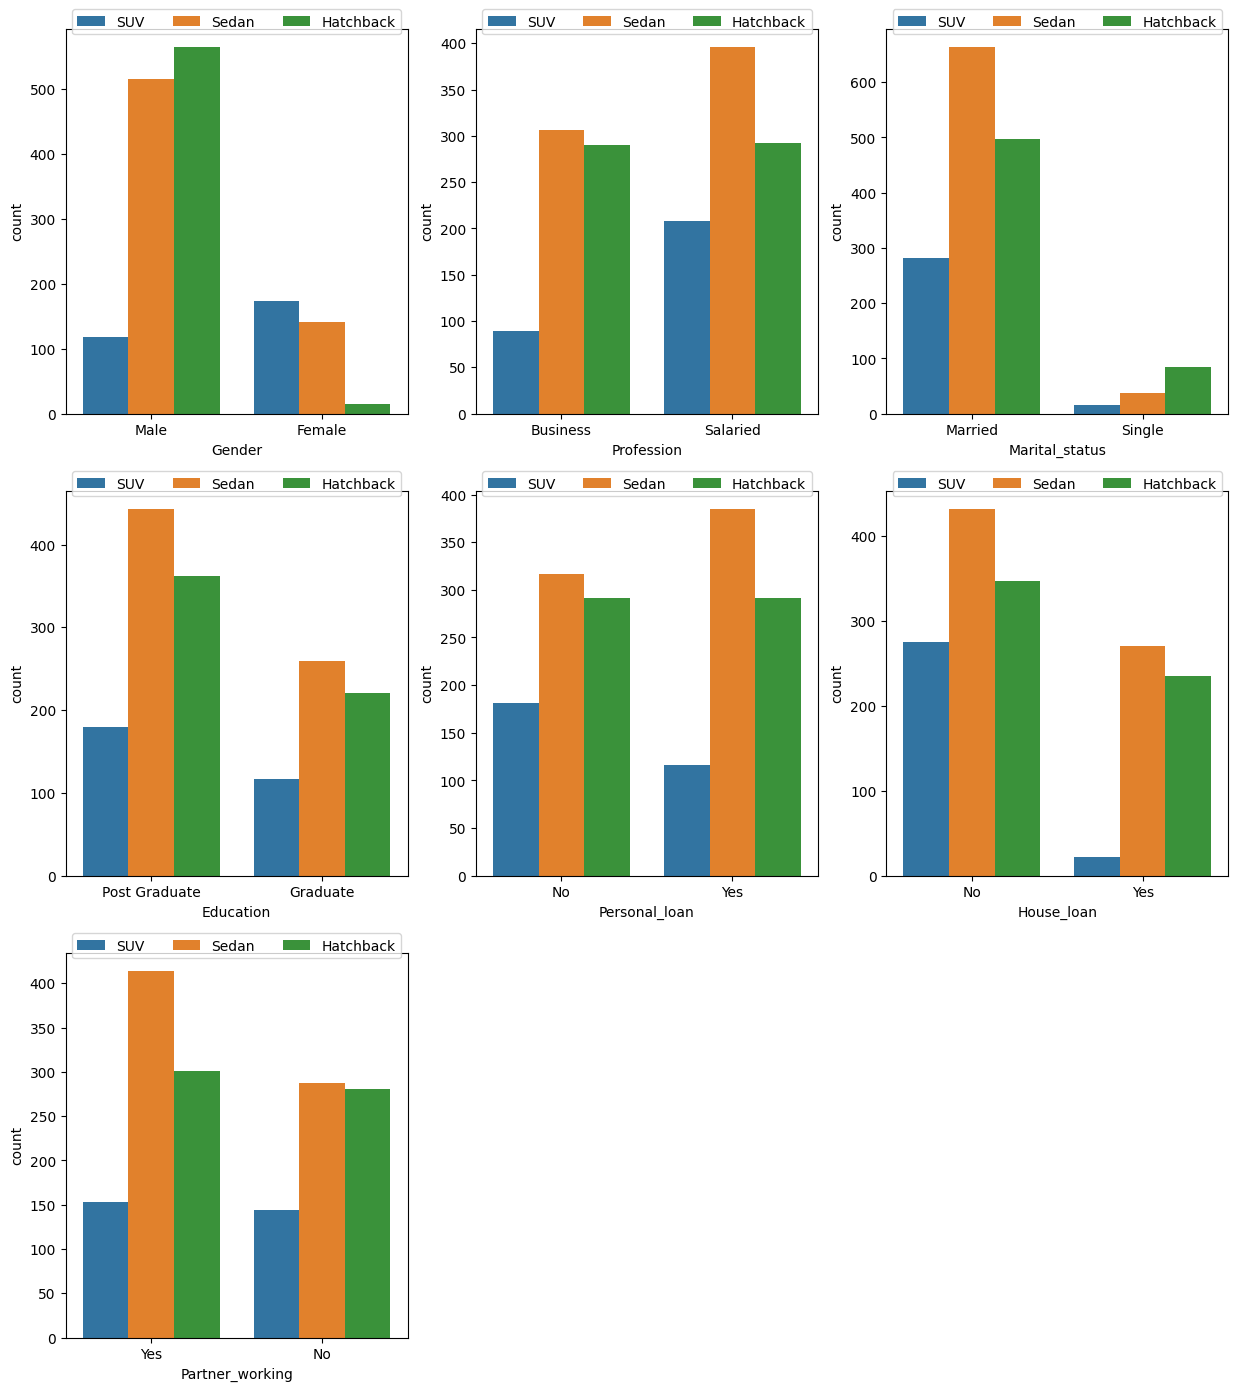

In [ ]:

pc=1
plt.figure(figsize=(15,17))
for i in df.select_dtypes(include=['object']):
  if(i=='Make'):
    continue
  plt.subplot(3,3,pc)
  #sb.histplot(data=df,x=i)
  sb.countplot(data=df,x=i,hue='Make')
  plt.legend(bbox_to_anchor=(0.5, 1.05), loc='upper center',ncol=3, borderaxespad=0);
  pc+=1

##E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.
E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

<Axes: xlabel='Gender', ylabel='count'>

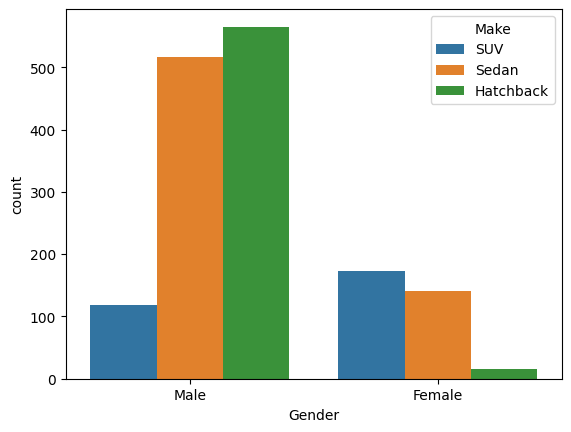

In [ ]:
sb.countplot(data=df,x='Gender',hue='Make');

###E2) Ned Stark believes that a salaried person is more likely to buy a Sedan

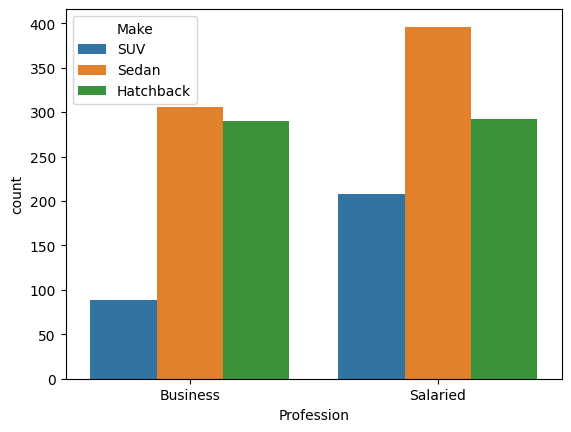

In [ ]:
sb.countplot(data=df,x='Profession',hue='Make');

###E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale – Disagree, As per below data it clearly shows salaried males prefer sedan more than SUV. 

In [ ]:
df.groupby(by=['Gender','Profession','Make'])['Gender','Profession','Make'].value_counts()


<ipython-input-80-c23c77c90b00>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by=['Gender','Profession','Make'])['Gender','Profession','Make'].value_counts()


Gender  Profession  Make     
Female  Business    SUV           55
                    Sedan         50
        Salaried    Hatchback     15
                    SUV          118
                    Sedan         91
Male    Business    Hatchback    289
                    SUV           33
                    Sedan        237
        Salaried    Hatchback    276
                    SUV           85
                    Sedan        279
dtype: int64

##F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

Give justification along with presenting metrics/charts used for arriving at the conclusions.

F1) Gender

F2) Personal_loan

In [ ]:
df.groupby(by='Gender')['Gender','Price'].sum()

<ipython-input-81-09a07d2416b6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by='Gender')['Gender','Price'].sum()


,Price
Gender,
Female,15695000
Male,39348000


In [ ]:
df.groupby(by='Personal_loan')['Personal_loan','Price'].sum()

<ipython-input-82-fa6c9b5b89cd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by='Personal_loan')['Personal_loan','Price'].sum()


,Price
Personal_loan,
No,28990000
Yes,27290000


##G. From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

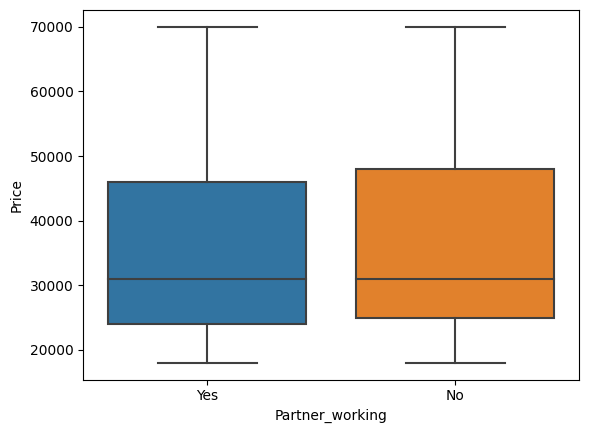

In [ ]:
#plt.pie(x=df['Partner_working'].value_counts(),labels=df['Partner_working'].unique(),normalize=True,shadow=True,explode=[0.1,0.1]);

sb.boxplot(data=df,x='Partner_working',y='Price');



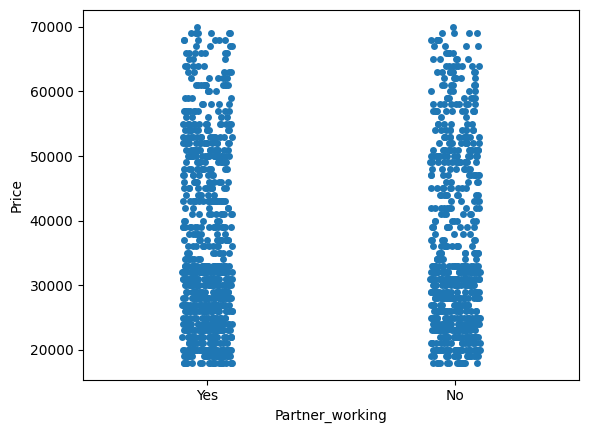

In [ ]:
sb.stripplot(data=df,x='Partner_working',y='Price');

##H. The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.


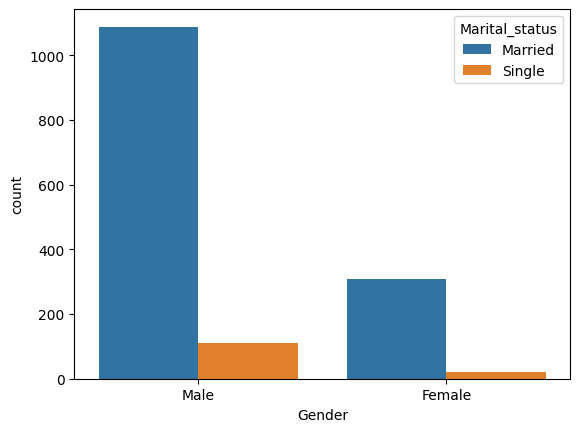

In [ ]:
sb.countplot(data=df,x='Gender',hue='Marital_status');

##Correlation matrix just for reference.

<Axes: >

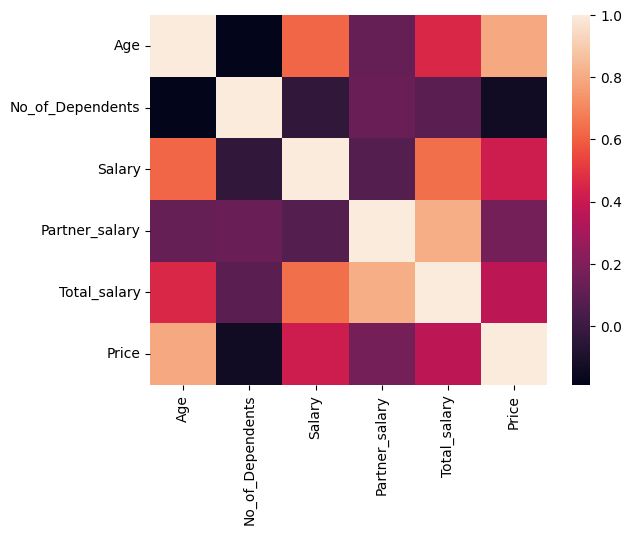

In [ ]:
df_num = df.select_dtypes(exclude='object')
df_num
sb.heatmap(df_num.corr())


#Problem 2
##A bank can generate revenue in a variety of ways, such as charging interest, transaction fees and financial advice. Interest charged on the capital that the bank lends out to customers has historically been the most significant method of revenue generation. The bank earns profits from the difference between the interest rates it pays on deposits and other sources of funds, and the interest rates it charges on the loans it gives out.

GODIGT Bank is a mid-sized private bank that deals in all kinds of banking products, such as savings accounts, current accounts, investment products, etc. among other offerings. The bank also cross-sells asset products to its existing customers through personal loans, auto loans, business loans, etc., and to do so they use various communication methods including cold calling, e-mails, recommendations on the net banking, mobile banking, etc.

GODIGT Bank also has a set of customers who were given credit cards based on risk policy and customer category class but due to huge competition in the credit card market, the bank is observing high attrition in credit card spending. The bank makes money only if customers spend more on credit cards. Given the attrition, the Bank wants to revisit its credit card policy and make sure that the card given to the customer is the right credit card. The bank will make a profit only through the customers that show higher intent towards a recommended credit card. (Higher intent means consumers would want to use the card and hence not be attrite.)

<Axes: >

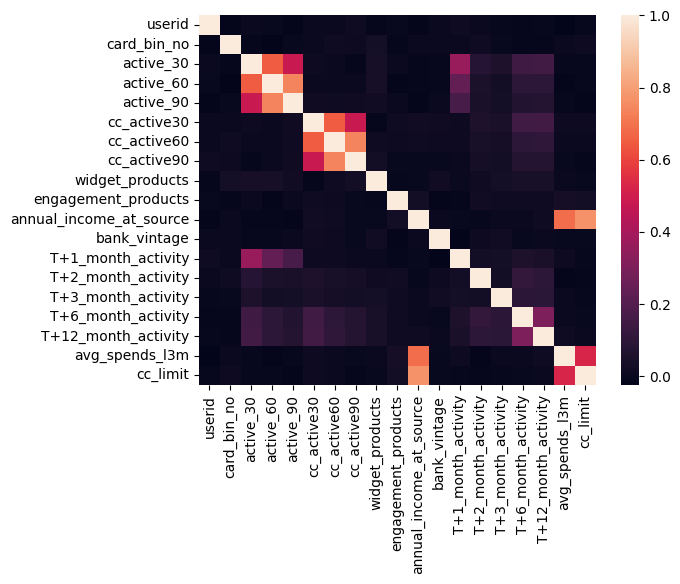

In [ ]:
df_bank=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/godigt_cc_data.xlsx")
sb.heatmap(df_bank.corr())


In [ ]:
df_bank.head(5)

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [ ]:
df_bank.card_type.value_counts()

rewards       1502
prosperity    1007
edge           980
chartered      923
smartearn      765
shoprite       688
indianoil      680
cashback       676
aura           652
gold           145
prime          112
pulse          101
elite           96
centurion       62
platinum        59
Name: card_type, dtype: int64

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

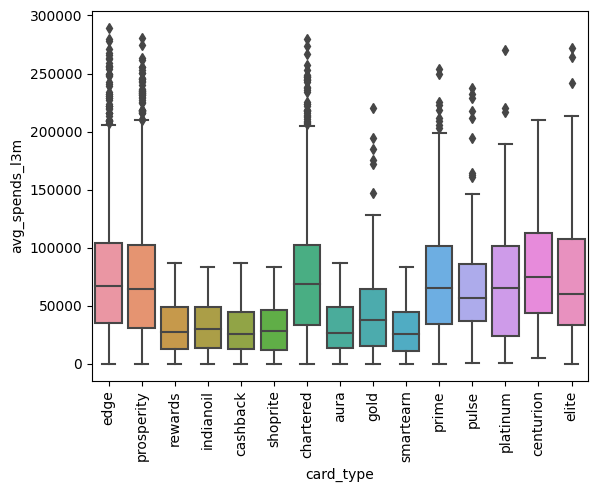

In [ ]:
plt.xticks(rotation=90)
sb.boxplot(data=df_bank,x='card_type',y='avg_spends_l3m');

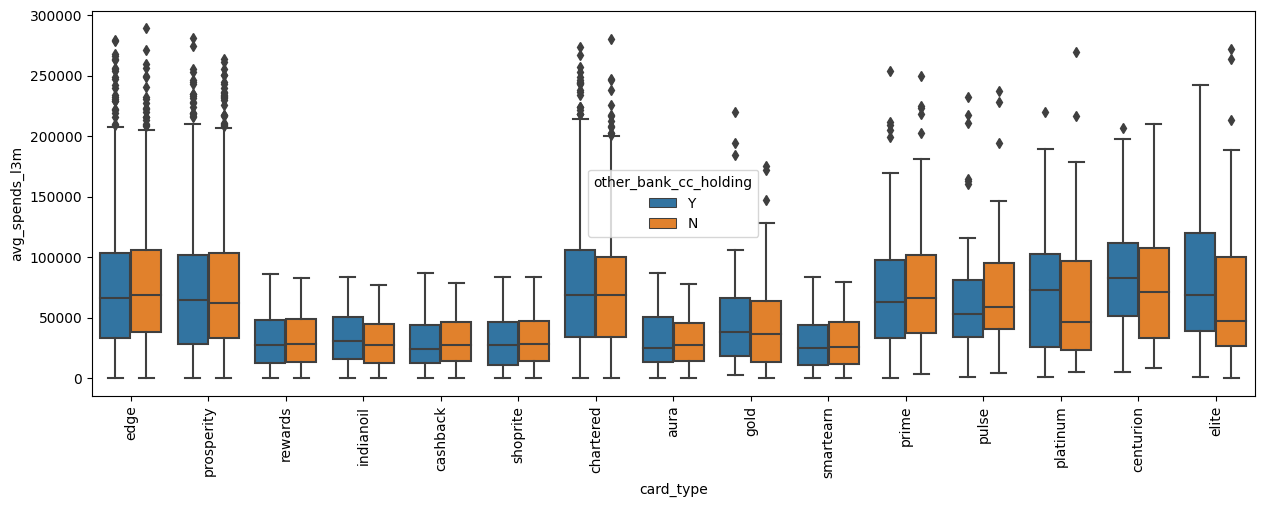

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sb.boxplot(data=df_bank,x='card_type',y='avg_spends_l3m',hue='other_bank_cc_holding');

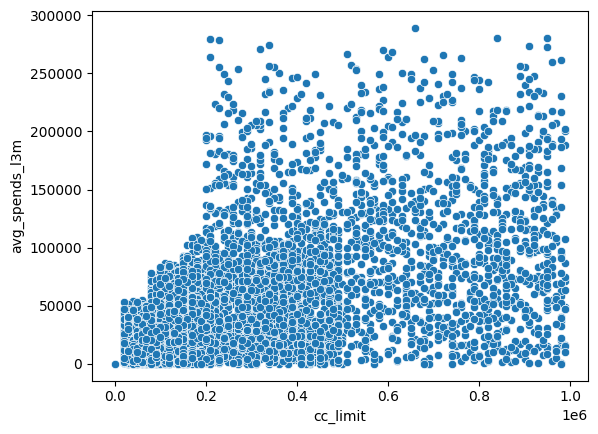

In [ ]:
sb.scatterplot(data=df_bank,x='cc_limit',y='avg_spends_l3m',markers=True);

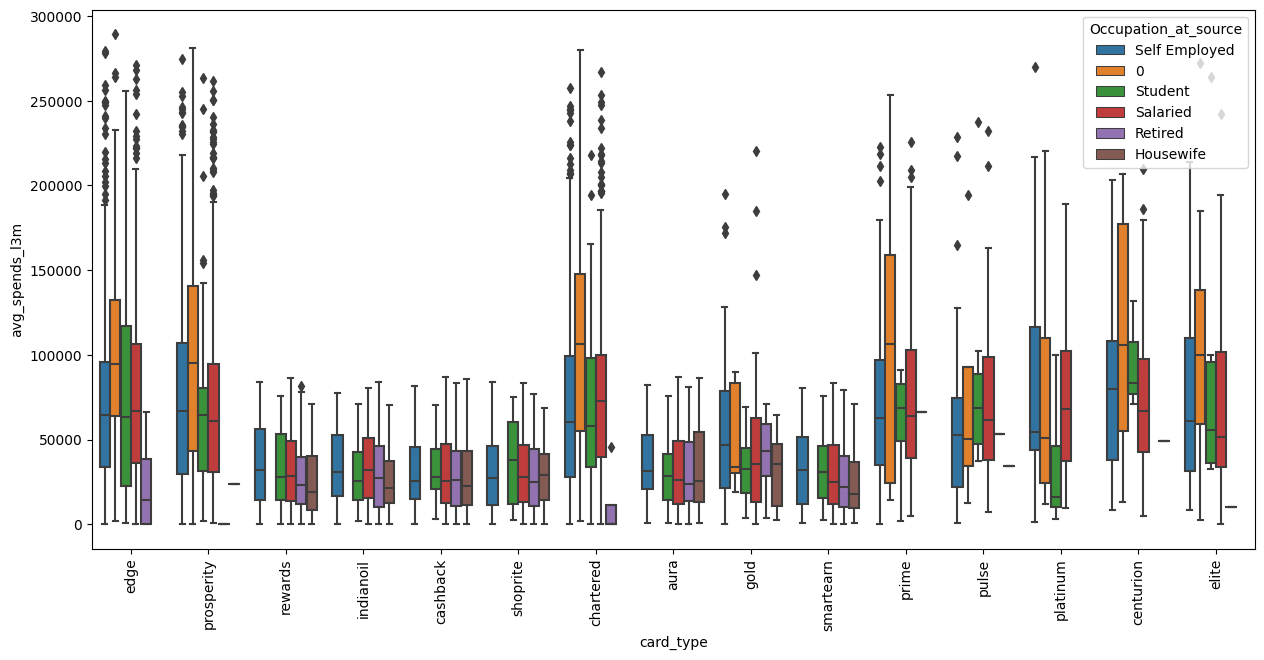

In [ ]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)

sb.boxplot(data=df_bank,x='card_type',y='avg_spends_l3m',hue='Occupation_at_source');

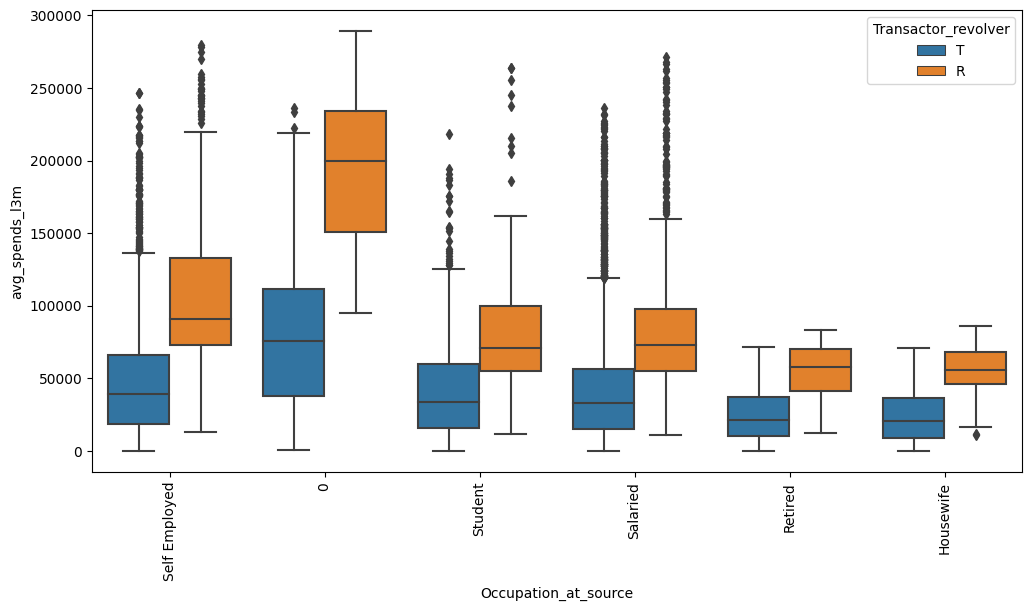

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sb.boxplot(data=df_bank,x='Occupation_at_source',y='avg_spends_l3m',hue='Transactor_revolver');

<Axes: xlabel='widget_products', ylabel='avg_spends_l3m'>

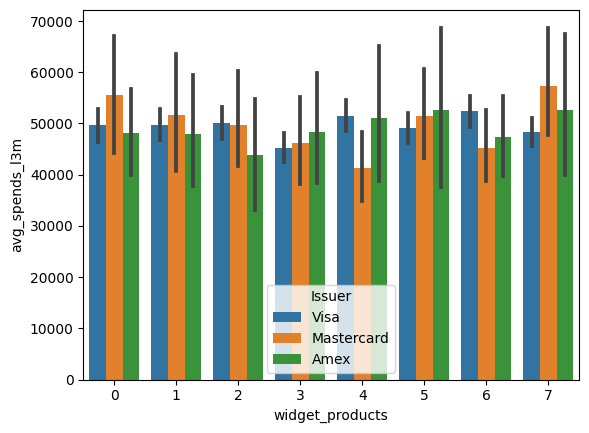

In [ ]:
sb.barplot(data=df_bank,x='widget_products',y='avg_spends_l3m',hue='Issuer')

In [ ]:
df_bank['avg_spends_l3m'].corr(df_bank['annual_income_at_source'])

0.6846947742354278